In [3]:
# California Housing Dataset

In [31]:
import os
import tarfile
from six.moves import urllib
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from zlib import crc32
from sklearn.model_selection import StratifiedShuffleSplit

In [5]:
########## Task no. 1 - Data Collection ##########

In [6]:
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

In [7]:
# The function below, when called shall create a directory "dataset/housing",
# downloads the housing.tgz file and extracts the housing.csv from it.

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [8]:
# The function below loads the data using Pandas

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

In [9]:
# Using the above functions "fetch_housing_data" and "load_housing_data" 
# to store the data in variable called "housing"

fetch_housing_data()
housing = load_housing_data()

In [10]:
########## Task no. 2 - Data analysis ##########

In [11]:
# Using key() just to see the given attributes for the data provided

housing.keys()

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [12]:
# Take a look at the complete dataset

housing

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income  median_house_value  \
0           322.0       126.0         8.3252            452600.0   
1          2401.0      1138.0         8.3014            358500.0   
2           496.0       177.0         7.2574            352100.0   
3           558.0       219.0         5.6431            341300.0   
4           565.0       259.0         3.8462            342200.0   
...           ...         ...            ...                 ...   
20635       845.0       330.0         1.5603             78100.0   
20636       356.0       114.0         2.5568             77100.0   
20637      1007.0       433.0         1.7000             92300.0   
20638       741.0       349.0         1.8672             84700.0   
20639      1387.0       530.0         2.3886             89400.0   

      ocean_proximity  
0            NEAR BAY  
1            NEAR BAY  
2            NEAR BAY  
3            NEAR BAY  
4            NEAR BAY  
...               ...  
20635          INLAND  
20636          INLAND  
20637          INLAND  
20638          INLAND  
20639          INLAND  

[20640 rows x 10 columns]

In [13]:
# To fetch important information about the data

housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [14]:
# Total bedrooms are lesser in quantity as compared to other attributes

In [15]:
# To summerize the numerical attributes

housing.describe()

longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.000000    787.000000    280.000000       2.563400   
50%        435.000000   1166.000000    409.000000       3.534800   
75%        647.000000   1725.000000    605.000000       4.743250   
max       6445.000000  35682.000000   6082.000000      15.000100   

       median_house_value  
count        20640.000000  
mean        206855.816909  
std         115395.615874  
min          14999.000000  
25%         119600.000000  
50%         179700.000000  
75%         264725.000000  
max         500001.000000

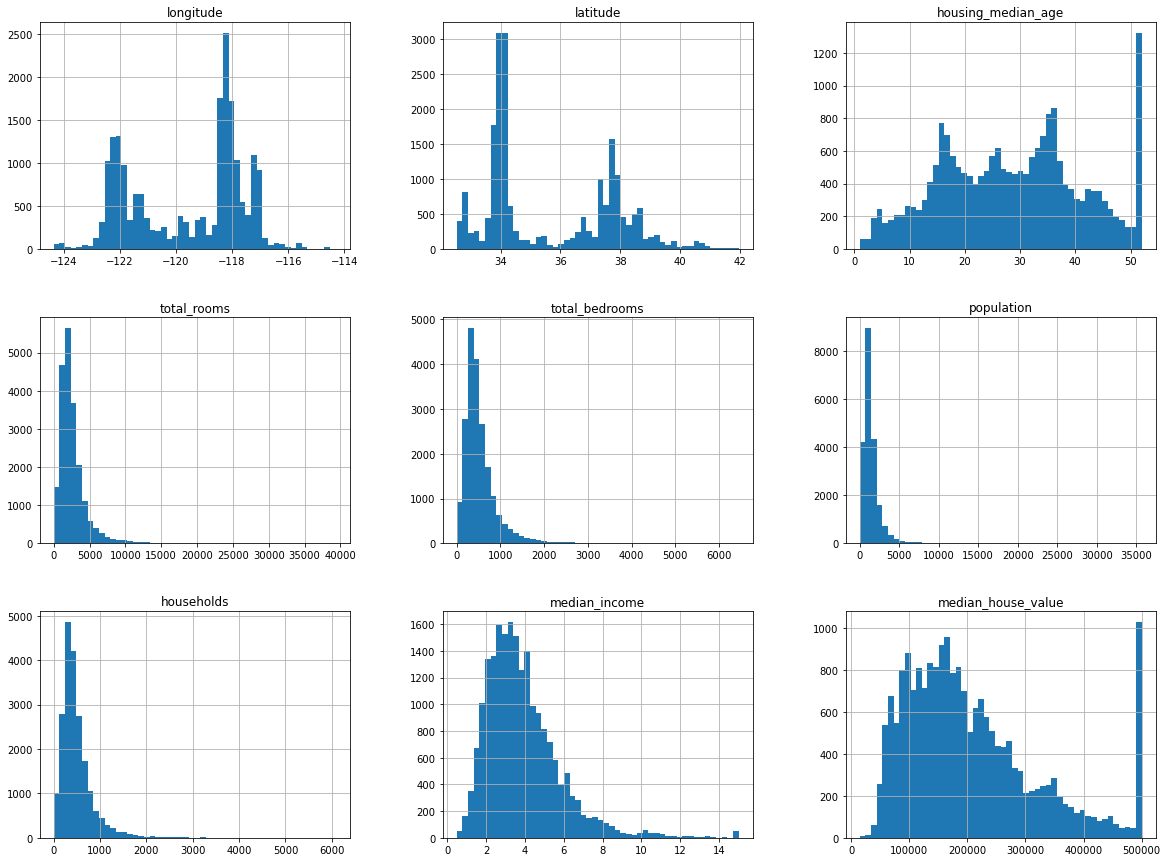

In [16]:
# Let's draw some histrograms

housing.hist(bins=50, figsize=(20,15))
plt.show()

In [29]:
# It can be clearly seen from the above histrograms that median_house_value
# (target attribute i.e. label) is closely related to median_income attribute

In [17]:
# Main problem: The target attritube(label) is capped.  
# Seconday problem: Histrograms are skewed i.e. tail heavy

In [18]:
########## Task no. 3 - Creating the testset ##########

In [19]:
#  Spliting the dataset into train/test sets, selecting the size
# of the test set 20 percent of the total dataset.

In [22]:
# The functions below will use each instance identifier to decide wheather or
# not the particular instance should be put in the test set by computing the 
# hash of each instance's identifier, but since the instances does not contain
# any identifier we shall use one of the most stable feature such as "latitude"
# and "longitude" to build a unique identifier.

def test_set_check(identifier, test_ratio):
    return crc32(np.int64(identifier)) & 0xffffffff < test_ratio * 2**32

def split_train_test_by_id(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]

In [24]:
housing_with_id = housing.reset_index() # adds an "index" column

housing_with_id["id"] = housing["longitude"] * 1000 + housing["latitude"]

train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "id")

In [25]:
# The Scikit learn's "split_train_test()" could also be used instead of the 
# self-made function above. It can provide additional features in case if needed.

In [28]:
# Suppose that the "median housing income" is an importnt attribute to predict
# the "median housing prices" but the the income ttribut is a continuous attribute
# therefore, income catagory attribute shall be created first.

# The following function uses the pandas function "pd.cut()", to create income 
# catagory attribute with five catagories.

housing["income_cat"] = pd.cut(housing["median_income"], bins=[0., 1.5, 3.0, 4.5, 6., np.inf], labels=[1, 2, 3, 4, 5])

<AxesSubplot:>

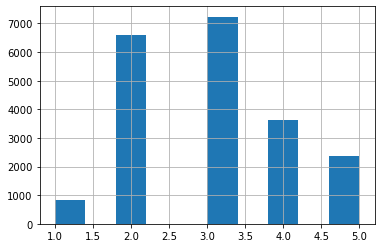

In [30]:
# Lets take a closer look at the histrogram of income catagories.

housing["income_cat"].hist()

In [32]:
# Now this income catagry is ready to be used for Stratified sampling.
# For that purpose scikit learns "stratifieShuffleSplit" class can be used.

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [33]:
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114583
1    0.039729
Name: income_cat, dtype: float64

In [34]:
# Now we remove the income_catagory attribute so that the data's previous state is restored 

for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

In [38]:
# Creating a copy of the training set to maintain its integrity for future use.

housing = strat_train_set.copy()

In [41]:
########## Task 4 - Dataset visualization ##########

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

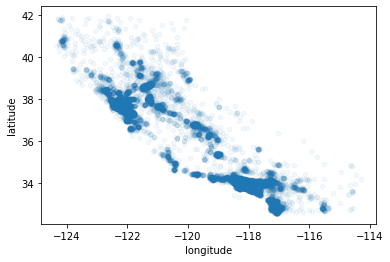

In [50]:
# Since the data consists of geographical information (Latitude and longitude),
# it is recommended to create a scatterplot of all the districts to visualize the data.

housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.05)

# The value of alpha can be used to visualize the high-density areas.

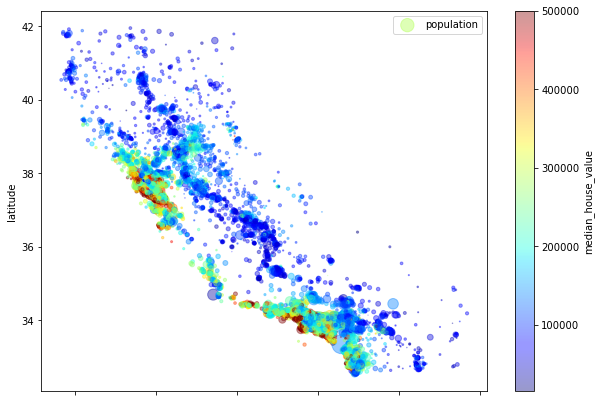

In [51]:
# Similarly, by using the same above function with some additional parameters,
# it is also possible to draw the scatterplot of housing prices.

housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4, s=housing["population"]/100, label="population", figsize=(10,7), c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True)

plt.legend()

In [52]:
# The Darker the color, the Higher the price

In [1]:
print("Hello World")

Hello World
